In [38]:
from yuning_util.dev_mode import DevMode
pkg_dev = DevMode(pkg='k-seq')
pkg_dev.on()

from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

from k_seq.data import count_file, seq_table, seq_table_vis, transform
from k_seq.utility import func_tools
reload(count_file)
reload(seq_table)
reload(func_tools)
reload(seq_table_vis)
reload(seq_table)
reload(transform)

<module 'k_seq.data.transform' from '/home/yuning/research/k-seq/src/pkg/k_seq/data/transform.py'>

# Load dopped pool count file and convert to `SeqTable`

In [5]:
byo_doped = seq_table.SeqTable.load_default_dataset(dataset='byo_doped', from_count_file=False)

# byo_doped.to_pickle('/mnt/storage/projects/k-seq/datasets/byo_doped.pkl')

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo_doped.pkl
Imported!


In [25]:
byo_doped.table_filtered_reacted_frac.loc['CTACTTCAAACAATCGGTCTG']

A1    0.270427
A2    0.369641
A3    0.598627
B1    0.378180
B2    0.400688
B3    0.378988
C1    0.153022
C2    0.129371
C3    0.154642
D1    0.030471
D2    0.029956
D3    0.029584
E1    0.006454
E2    0.006420
E3    0.005430
Name: CTACTTCAAACAATCGGTCTG, dtype: Sparse[float64, nan]

In [20]:
byo_doped.x_values

A1    0.001250
A2    0.001250
A3    0.001250
B1    0.000250
B2    0.000250
B3    0.000250
C1    0.000050
C2    0.000050
C3    0.000050
D1    0.000010
D2    0.000010
D3    0.000010
E1    0.000002
E2    0.000002
E3    0.000002
R0         NaN
dtype: float64

(-0.0001, 0.002)

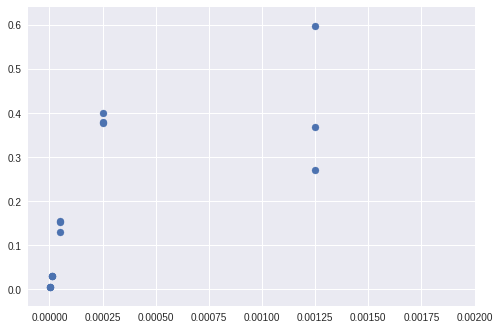

In [29]:
plt.scatter(byo_doped.x_values[:-1], byo_doped.table_filtered_reacted_frac.loc['CTACTTCAAACAATCGGTCTG'])
plt.xlim([-0.0001, 0.002])

(-0.01, 0.1)

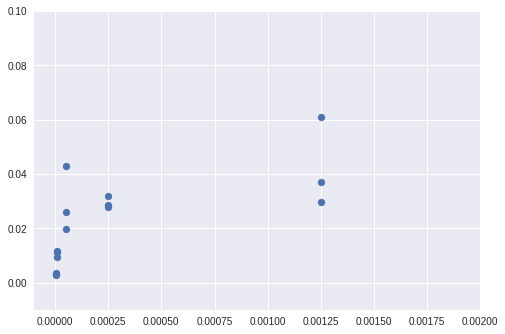

In [37]:
plt.scatter(byo_doped.x_values[:-1], byo_doped.table_filtered_reacted_frac.loc['ATTACCCTGGTCATCTAGTGA'])
plt.xlim([-0.0001, 0.002])
plt.ylim([-0.01, 0.1])

In [32]:
byo_doped.filtered_table / byo_doped.filtered_table.sum(0)

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
CTACTTCAAACAATCGGTCTG,0.170336,0.185785,0.183417,0.208750,0.227876,0.223866,0.165513,0.211476,0.202236,0.148771,0.165060,0.150358,0.120377,0.146240,0.130461,4.307254e-02
CCACACTTCAAGCAATCGGTC,0.157623,0.172356,0.175545,0.176270,0.186841,0.188416,0.123412,0.154963,0.143726,0.107025,0.120984,0.101456,0.082921,0.102752,0.087258,3.698026e-02
ATTACCCTGGTCATCGAGTGA,0.101214,0.093264,0.095749,0.129763,0.119526,0.127444,0.243107,0.199672,0.218070,0.268535,0.252730,0.287162,0.285635,0.346899,0.368689,3.304391e-02
AAGTTTGCTAATAGTCGCAAG,0.081277,0.071187,0.075233,0.093649,0.076017,0.077577,0.068686,0.059824,0.066450,0.058643,0.045599,0.045366,0.048775,0.032280,0.036552,4.216928e-02
GTACTTCAAACAATCGGTCTG,0.008070,0.007824,0.007847,0.008760,0.008924,0.008672,0.006379,0.007760,0.007153,0.005608,0.005788,0.004847,0.004286,0.004607,0.004040,2.545138e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACACGCCACACGCAATCGGTC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.932170e-08
AACTCTGCGAATAATCGCAAG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.932170e-08
ATTACTATGGTCGTCGAGTGC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.932170e-08
ATTGCCTTGGTCATCGACAGA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.932170e-08


In [33]:
byo_doped.reacted_frac_filtered

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3
CTACTTCAAACAATCGGTCTG,0.270427,0.369641,0.598627,0.378180,0.400688,0.378988,0.153022,0.129371,0.154642,0.030471,0.029956,0.029584,0.006454,0.006420,0.005430
CCACACTTCAAGCAATCGGTC,0.291469,0.399418,0.667322,0.371948,0.382656,0.371522,0.132896,0.110417,0.128007,0.025532,0.025574,0.023251,0.005178,0.005254,0.004230
ATTACCCTGGTCATCGAGTGA,0.209456,0.241876,0.407345,0.306432,0.273955,0.281231,0.292973,0.159222,0.217357,0.071694,0.059787,0.073648,0.019961,0.019851,0.020001
AAGTTTGCTAATAGTCGCAAG,0.131800,0.144669,0.250802,0.173294,0.136528,0.134145,0.064863,0.037381,0.051900,0.012268,0.008453,0.009117,0.002671,0.001447,0.001554
GTACTTCAAACAATCGGTCTG,0.216827,0.263438,0.433435,0.268581,0.265559,0.248443,0.099804,0.080341,0.092561,0.019440,0.017776,0.016141,0.003888,0.003423,0.002846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTCACTTCAAGCCATTGATC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002568
AAGTTTGCTAATGGCTGCAAA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002568
CCACACCTCAACCAATCTGCC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005136
CGACCTCAAACAACCGGTCAG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002568


In [6]:
byo_doped.table_in_all_samples

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3
CTACTTCAAACAATCGGTCTG,0.270427,0.369641,0.598627,0.378180,0.400688,0.378988,0.153022,0.129371,0.154642,0.030471,0.029956,0.029584,0.006454,0.006420,0.005430
CCACACTTCAAGCAATCGGTC,0.291469,0.399418,0.667322,0.371948,0.382656,0.371522,0.132896,0.110417,0.128007,0.025532,0.025574,0.023251,0.005178,0.005254,0.004230
ATTACCCTGGTCATCGAGTGA,0.209456,0.241876,0.407345,0.306432,0.273955,0.281231,0.292973,0.159222,0.217357,0.071694,0.059787,0.073648,0.019961,0.019851,0.020001
AAGTTTGCTAATAGTCGCAAG,0.131800,0.144669,0.250802,0.173294,0.136528,0.134145,0.064863,0.037381,0.051900,0.012268,0.008453,0.009117,0.002671,0.001447,0.001554
GTACTTCAAACAATCGGTCTG,0.216827,0.263438,0.433435,0.268581,0.265559,0.248443,0.099804,0.080341,0.092561,0.019440,0.017776,0.016141,0.003888,0.003423,0.002846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTTACTCTGGTCAACGAGTGA,0.004984,0.006352,0.053839,0.018255,0.020933,0.011129,0.007746,0.007199,0.010803,0.006146,0.005136,0.005942,0.001284,0.001547,0.001216
ATTACCCCTGTCCTCGAGTGA,0.004620,0.023548,0.022682,0.005640,0.014551,0.025787,0.028717,0.006672,0.017522,0.004557,0.004232,0.003059,0.001785,0.000597,0.000877
ATTAGCCCTGTCATCGAGTGA,0.004209,0.026819,0.016532,0.010277,0.008839,0.004699,0.029435,0.008105,0.013684,0.004671,0.003856,0.005017,0.002169,0.002177,0.001255
AGTACCCGGGACATCGAGTGA,0.005571,0.007099,0.038292,0.054407,0.017547,0.018658,0.012986,0.008045,0.015093,0.006183,0.007654,0.007379,0.002871,0.001153,0.002115


# Sample overview characterization

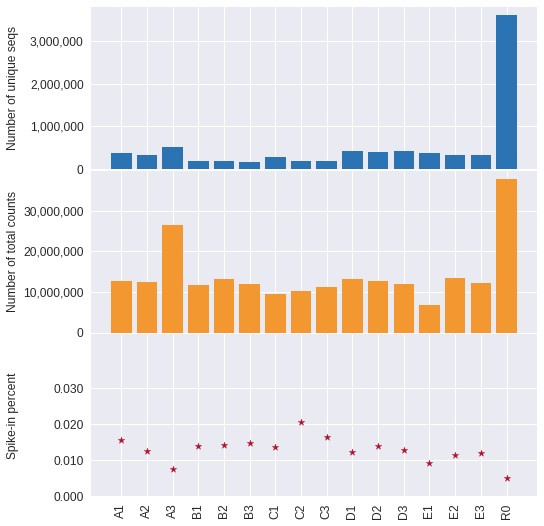

In [16]:
seq_table_vis.sample_overview_plots(seq_table=byo_doped)

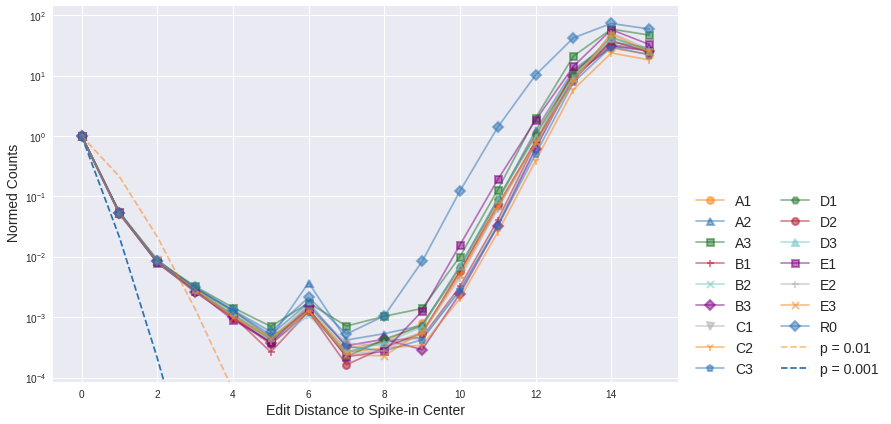

In [8]:
byo_table.spike_in.spike_in_peak_plot(err_guild_lines=[1e-2, 1e-3])
plt.show()

## [Legacy] Sequence filtering

All sample seems valid at the moment, however, quite a bit sequences are not in the scope of landscape, do the filter:
- Remove spike-in sequences
- Remove sequences that are not 21 nt
- Remove singletons as they have limited/discrete information of reactivity


In [202]:
from k_seq.data import filters
reload(filters)

spike_in_filter = filters.SpikeInFilter(target=byo_table)
seq_length_filter = filters.SeqLengthFilter(target=byo_table, min_len=21, max_len=21)
singleton_filter = filters.SingletonFilter(target=byo_table)

In [203]:
byo_table.filtered_table = singleton_filter.get_filtered_table(seq_length_filter.get_filtered_table(target=spike_in_filter.get_filtered_table()))

In [109]:
byo_table.filtered_rel_abun = byo_table.filtered_table / byo_table.filtered_table.sum(axis=0)

In [12]:
not_spike_in_filer = ~byo_doped_table.table.index.isin(byo_doped_table.grouper.spike_in_seqs.group)
length_filter = byo_doped_table.table.index.to_series().apply(lambda seq: len(seq)==21)
non_singleton_filter = byo_doped_table.table.sum(axis=1) > 1

print(f'Num of unique seqs:{byo_doped_table.table.shape[0]:,d}')
print(f'Num of unique seqs (no spike-in): {np.sum(not_spike_in_filer):,d}')
print(f'Num of unique seqs (no spike-in, 21 nt): {np.sum(not_spike_in_filer & length_filter):,d}')
print(f'Num of unique seqs (no spike-in, 21 nt, no singleton): {np.sum(not_spike_in_filer & length_filter & non_singleton_filter):,d}')

Num of unique seqs:4,784,214
Num of unique seqs (no spike-in): 4,780,281
Num of unique seqs (no spike-in, 21 nt): 3,582,676
Num of unique seqs (no spike-in, 21 nt, no singleton): 1,344,671


In [13]:
byo_doped_table.seq_list = byo_doped_table.seq_list[not_spike_in_filer & length_filter & non_singleton_filter]

In [14]:
byo_doped_table.table

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
AAAAAACTGGTAATCGTGCGA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AAAAAATTAAATAAATCGTTC,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
AAAAAATTCAAGCAATCGGTC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AAAAACAAAAACAAATAGCTC,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
AAAAACAAAAACAAATAGCTT,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTGCTACTAGTCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
TTTTTTGCTAGTAGTCGCAAG,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TTTTTTGCTCATAGTCGCAAG,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TTTTTTGCTGATAGTCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


# Pool distribution

In [204]:
byo_table.filtered_table

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
CTACTTCAAACAATCGGTCTG,2073359,2223890,4673972,2375053,2925890,2602711,1509853,2060371,2188132,1894508,2005826,1712433,768138,1903080,1535263,1452168
CCACACTTCAAGCAATCGGTC,1918612,2063146,4473364,2005514,2398999,2190556,1125797,1509769,1555068,1362890,1470216,1155490,529124,1337152,1026848,1246770
ATTACCCTGGTCATCGAGTGA,1231995,1116392,2439960,1476384,1534694,1481682,2217682,1945364,2359447,3419619,3071206,3270499,1822663,4514332,4338722,1114058
AAGTTTGCTAATAGTCGCAAG,989320,852125,1917147,1065499,976044,901923,626570,582849,718972,746781,554123,516678,311240,420069,430141,1421715
GTACTTCAAACAATCGGTCTG,98231,93653,199970,99669,114584,100818,58189,75606,77390,71419,70333,55207,27347,59957,47546,85808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACACGCCACACGCAATCGGTC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AACTCTGCGAATAATCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
ATTACTATGGTCGTCGAGTGC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
ATTGCCTTGGTCATCGACAGA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [38]:
input_pool = byo_table.filtered_table.loc[:, byo_table.filtered_table.columns.isin(byo_table.grouper.input)]
reacted_pool = byo_table.filtered_table.loc[:, ~byo_table.filtered_table.columns.isin(byo_table.grouper.input)]

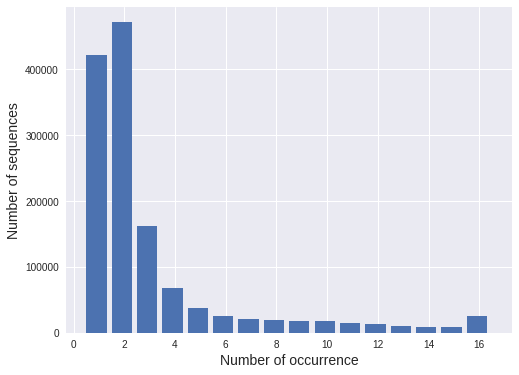

In [52]:
occur = (byo_table.filtered_table > 0).sum(axis=1)
fig, ax = plt.subplots(1, 1, figsize=[8, 6])
bins = np.linspace(0.5, 16.5, 17)
ax.hist(occur, bins=bins, width=0.8)
ax.set_xlabel('Number of occurrence', fontsize=14)
ax.set_ylabel('Number of sequences', fontsize=14)
plt.show()

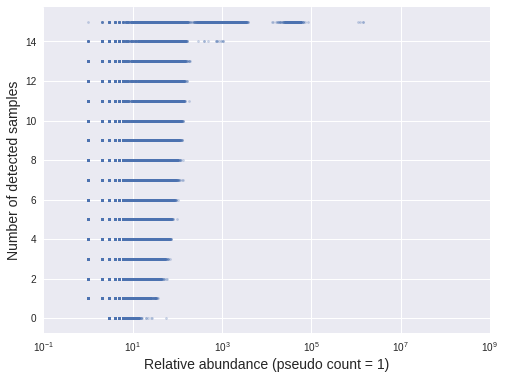

In [61]:
occur = (reacted_pool > 0).sum(axis=1)
rel_abun = (input_pool.R0 + 1)
fig, ax = plt.subplots(1, 1, figsize=[8, 6])
ax.scatter(rel_abun, occur, s=5, alpha=0.3)
ax.set_xlabel('Relative abundance (pseudo count = 1)', fontsize=14)
ax.set_ylabel('Number of detected samples', fontsize=14)
ax.set_xscale('log')
ax.set_xlim([0.1, 1e9])
plt.show()

## Variance of measurements
### Reference free
Don't use spike-in or total DNA amount as absolute amount reference

In [440]:
byo_doped_table.seq_list = list(byo_doped_table.table.index[not_spike_in_filer & length_filter & non_singleton_filter])

## Replicate variance analysis
convert to pkg code for this
  - use grouper and target_table

In [8]:
from k_seq.data.seq_table import Grouper

grouper_info = {
    'input': ['R0'],
    'reacted': {'group': ['A1', 'A2', 'A3', 'B1', 'B2'], 'axis':1},
    'byo': {
        '1250': ['A1', 'A2', 'A3'],
        '250': ['B1', 'B2', 'B3']
    }
}

grouper = Grouper(groupers=grouper_info, target=byo_doped_table.table)

ImportError: cannot import name 'Grouper' from 'k_seq.data.seq_table' (/home/yuning/research/k-seq/src/pkg/k_seq/data/seq_table.py)

In [10]:
byo_table.grouper

In [447]:
byo_doped_table.table

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
AAAAAACTGGTAATCGTGCGA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AAAAAATTAAATAAATCGTTC,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
AAAAAATTCAAGCAATCGGTC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AAAAACAAAAACAAATAGCTC,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
AAAAACAAAAACAAATAGCTT,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTGCTACTAGTCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
TTTTTTGCTAGTAGTCGCAAG,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TTTTTTGCTCATAGTCGCAAG,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TTTTTTGCTGATAGTCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [11]:
from k_seq.data.grouper import Grouper

byo_table.grouper = Grouper(groupers={'input': ['R0']}, target=byo_table.filtered_table)

byo_table.grouper.add({
    'byo':{1250:['A1', 'A2', 'A3'],
           250: ['B1', 'B2', 'B3'],
           50: ['C1', 'C2', 'C3'],
           10: ['D1', 'D2', 'D3'],
           2: ['E1', 'E2', 'E3']}}, target=byo_table.filtered_table
)

In [15]:
byo_table.grouper.byo.target

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
CTACTTCAAACAATCGGTCTG,2073359,2223890,4673972,2375053,2925890,2602711,1509853,2060371,2188132,1894508,2005826,1712433,768138,1903080,1535263,1452168
CCACACTTCAAGCAATCGGTC,1918612,2063146,4473364,2005514,2398999,2190556,1125797,1509769,1555068,1362890,1470216,1155490,529124,1337152,1026848,1246770
ATTACCCTGGTCATCGAGTGA,1231995,1116392,2439960,1476384,1534694,1481682,2217682,1945364,2359447,3419619,3071206,3270499,1822663,4514332,4338722,1114058
AAGTTTGCTAATAGTCGCAAG,989320,852125,1917147,1065499,976044,901923,626570,582849,718972,746781,554123,516678,311240,420069,430141,1421715
GTACTTCAAACAATCGGTCTG,98231,93653,199970,99669,114584,100818,58189,75606,77390,71419,70333,55207,27347,59957,47546,85808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACACGCCACACGCAATCGGTC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AACTCTGCGAATAATCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
ATTACTATGGTCGTCGAGTGC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
ATTGCCTTGGTCATCGACAGA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


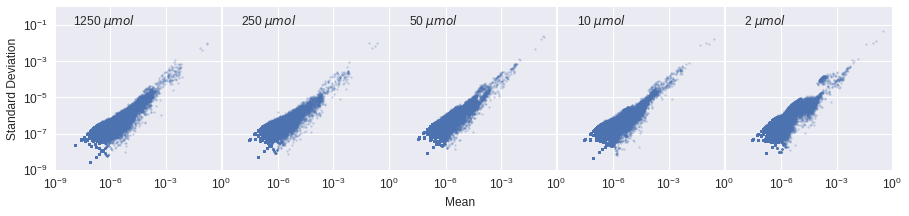

In [17]:
table_gen = byo_table.grouper.byo.get_table(remove_zero=True)

fig, axes = plt.subplots(1, 5, figsize=[15, 3], sharey=True)
fig.subplots_adjust(hspace=0, wspace=0.01)

for ix, ((key, table), ax) in enumerate(zip(table_gen, axes)):
    rel_abun = table / table.sum(axis=0)
    ax.scatter(rel_abun.mean(axis=1), rel_abun.std(axis=1), s=3, alpha=0.3)
    ax.text(s=f'{key:d} $\mu mol$', x=1e-8, y=1e-1, fontsize=12)
    ax.set_xscale('log')
    ax.set_xlim([1e-9, 1])
    ax.set_yscale('log')
    ax.set_ylim([1e-9, 1])
    ax.tick_params(axis='both', labelsize=12)
    if ix > 0:
        xticks = [tick for tick in ax.get_xticks()][2:-1]
        ax.set_xticks(xticks)
    else:
        ax.set_ylabel('Standard Deviation', fontsize=12)

fig.text(s='Mean', x=0.5, y=0, ha='center', va='top', fontsize=12)
plt.show()

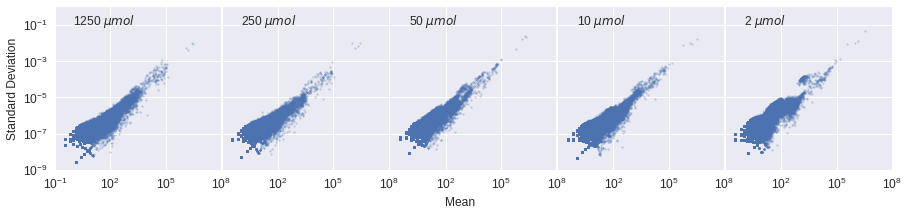

In [32]:
table_gen = byo.grouper.byo.get_table(remove_zero=True)

fig, axes = plt.subplots(1, 5, figsize=[15, 3], sharey=True)
fig.subplots_adjust(hspace=0, wspace=0.01)

for ix, ((key, table), ax) in enumerate(zip(table_gen, axes)):
    rel_abun = table / table.sum(axis=0)
    ax.scatter(table.mean(axis=1), rel_abun.std(axis=1), s=3, alpha=0.3)
    ax.text(s=f'{key:d} $\mu mol$', x=1, y=1e-1, fontsize=12)
    ax.set_xscale('log')
    ax.set_xlim([0.1, 1e8])
    ax.set_yscale('log')
    ax.set_ylim([1e-9, 1])
    ax.tick_params(axis='both', labelsize=12)
    if ix > 0:
        xticks = [tick for tick in ax.get_xticks()][2:-1]
        ax.set_xticks(xticks)
    else:
        ax.set_ylabel('Standard Deviation', fontsize=12)
    
fig.text(s='Mean', x=0.5, y=0, ha='center', va='top', fontsize=12)
plt.show()

In [18]:
from k_seq.data import transform
reload(transform)

spike_in_norm = transform.SpikeInNormalizer(target=byo_doped_table)

A1     120.953173
A2     151.580433
A3     248.651077
B1     138.021484
B2     133.961512
B3     128.976326
C1      70.436195
C2      46.606878
C3      58.256222
D1      15.604318
D2      13.826527
D3      14.989938
E1       4.084483
E2       3.344652
E3       3.170765
R0    1768.776553
dtype: float64

In [21]:
byo_table.spike_in.apply(target=byo_table.filtered_table)

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
CTACTTCAAACAATCGGTCTG,20.602660,28.161379,45.606846,28.811920,30.526673,28.873455,11.658106,9.856254,11.781506,2.321473,2.282200,2.253854,0.491679,0.489123,0.413661,25.395233
CCACACTTCAAGCAATCGGTC,19.064962,26.125859,43.649389,24.329019,25.029464,24.301169,8.692675,7.222324,8.372915,1.670045,1.672791,1.520822,0.338688,0.343670,0.276674,21.803273
ATTACCCTGGTCATCGAGTGA,12.242151,14.137002,23.808204,17.910109,16.011915,16.437199,17.123503,9.306092,12.703913,4.190299,3.494375,4.304534,1.166672,1.160258,1.169026,19.482431
AAGTTTGCTAATAGTCGCAAG,9.830726,10.790558,18.706793,12.925637,10.183355,10.005580,4.837967,2.788191,3.871144,0.915083,0.630473,0.680036,0.199222,0.107965,0.115897,24.862677
GTACTTCAAACAATCGGTCTG,0.976107,1.185939,1.951231,1.209091,1.195489,1.118435,0.449298,0.361679,0.416689,0.087515,0.080024,0.072662,0.017505,0.015410,0.012811,1.500594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACACGCCACACGCAATCGGTC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000035
AACTCTGCGAATAATCGCAAG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000035
ATTACTATGGTCGTCGAGTGC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000035
ATTGCCTTGGTCATCGACAGA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000035


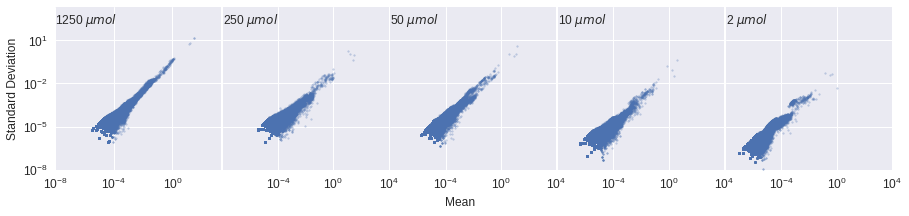

In [22]:
table_gen = byo_table.grouper.byo.get_table(target=byo_table.spike_in.apply(target=byo_table.filtered_table), remove_zero=True)

fig, axes = plt.subplots(1, 5, figsize=[15, 3], sharey=True)
fig.subplots_adjust(hspace=0, wspace=0.01)

for ix, ((key, table), ax) in enumerate(zip(table_gen, axes)):
    ax.scatter(table.mean(axis=1), table.std(axis=1), s=3, alpha=0.3)
    ax.text(s=f'{key:d} $\mu mol$', x=1e-8, y=1000, va='top', fontsize=12)
    ax.set_xscale('log')
    ax.set_xlim([1e-8, 2000])
    ax.set_yscale('log')
    ax.set_ylim([1e-8, 2000])
    ax.tick_params(axis='both', labelsize=12)
    if ix > 0:
        xticks = [tick for tick in ax.get_xticks()][2:-1]
        ax.set_xticks(xticks)
    else:
        ax.set_ylabel('Standard Deviation', fontsize=12)
    
fig.text(s='Mean', x=0.5, y=0, ha='center', va='top', fontsize=12)
plt.show()

In [560]:
byo_doped_table.table

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,E2,E3,R0
AAAAAACTGGTAATCGTGCGA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AAAAAATTAAATAAATCGTTC,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
AAAAAATTCAAGCAATCGGTC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AAAAACAAAAACAAATAGCTC,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
AAAAACAAAAACAAATAGCTT,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTGCTACTAGTCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
TTTTTTGCTAGTAGTCGCAAG,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TTTTTTGCTCATAGTCGCAAG,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TTTTTTGCTGATAGTCGCAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


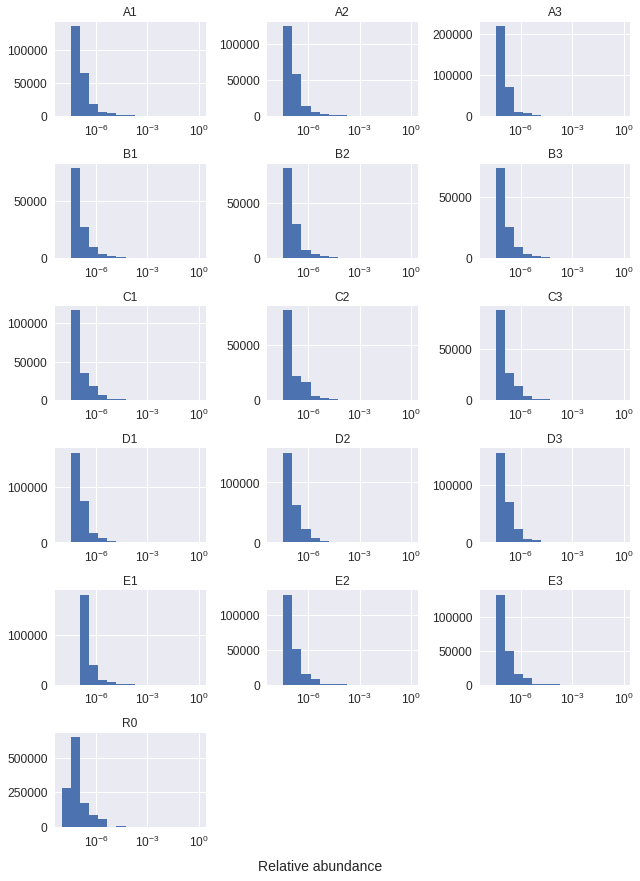

In [569]:
seq_table_vis.sample_rel_abun_hist(seq_table=byo_doped_table)

/home/yuning/.pyenv/versions/k-seq/lib/python3.7/site-packages/pandas/core/indexing.py:2418: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  result = result.to_dense()


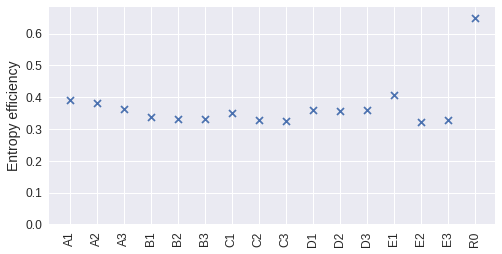

In [605]:
seq_table_vis.sample_entropy_scatterplot(byo_doped_table, normalize=True)

In [111]:
from k_seq.data import filters
reload(filters)

<module 'k_seq.data.filters' from '/home/yuning/research/k-seq/src/pkg/k_seq/data/filters.py'>

In [93]:
spike_in_filter = filters.SpikeInFilter(target=byo_doped_table)
spike_in_filter.summary()

,unique,unique_passed,total,total_passed
A1,366471,366471,12808719,12808719
A2,324369,324369,12528391,12528391
A3,514251,514251,26534366,26534366
B1,180803,180803,11820568,11820568
B2,188013,188013,13334445,13334445
B3,168492,168492,12090627,12090627
C1,276163,276163,9516938,9516938
C2,185372,185372,10178038,10178038
C3,200071,200071,11247585,11247585
D1,435084,435084,13318223,13318223


In [105]:
seq_length_filter = filters.SeqLengthFilter(target=byo_doped_table, min_len=21, max_len=21)

In [106]:
seq_length_filter.summary()

,unique,unique_passed,total,total_passed
A1,366471,290866,12808719,12424891
A2,324369,258704,12528391,12172314
A3,514251,403588,26534366,25775801
B1,180803,144242,11820568,11557233
B2,188013,149987,13334445,13046006
B3,168492,134263,12090627,11818575
C1,276163,219466,9516938,9285494
C2,185372,147609,10178038,9965328
C3,200071,159508,11247585,11022884
D1,435084,342290,13318223,12964895


In [70]:
from k_seq.data import transform
reload(transform)

byo_doped_table.metadata.spike_in = transform.SpikeInNormalizer(
    spike_in_seq='AAAAACAAAAACAAAAACAAA',
    spike_in_amount=np.concatenate((
                    np.repeat([2, 2, 1, 0.2, .04], repeats=3),
                    np.array([10/3])), axis=0
                ),
    radius=4,
    target=byo_doped_table
)

In [113]:
sing_filter = filters.SingletonFilter(target=byo_doped_table)

In [114]:
sing_filter.summary()

,unique,unique_passed,total,total_passed
A1,366471,280716,12808719,12722964
A2,324369,251837,12528391,12455859
A3,514251,376303,26534366,26396418
B1,180803,149694,11820568,11789459
B2,188013,155533,13334445,13301965
B3,168492,140257,12090627,12062392
C1,276163,218899,9516938,9459674
C2,185372,153070,10178038,10145736
C3,200071,163767,11247585,11211281
D1,435084,326904,13318223,13210043


## Compare to pool design

Convert to a doped_pool.py

In [139]:
from k_seq.data import landscape
reload(landscape)

pool_peaks = {
    'pk2': 'ATTACCCTGGTCATCGAGTGA',
    'pk1A': 'CTACTTCAAACAATCGGTCTG',
    'pk1B': 'CCACACTTCAAGCAATCGGTC',
    'pk3': 'AAGTTTGCTAATAGTCGCAAG'
}

pool_peaks = [landscape.Peaks(target=byo_table, center_seq=seq, name=name, radius=5)
              for name, seq in pool_peaks.items()]

In [141]:
mega_peak = landscape.Peaks.from_peak_list(pool_peaks)

In [155]:
pool_peaks[0].peak_abun(max_radius=5)[['A1', 'A2', 'A3']]

,A1,A2,A3
0,0.096184,0.089109,0.091955
1,0.171135,0.154632,0.157799
2,0.199262,0.179027,0.181491
3,0.209968,0.188294,0.190260
4,0.213991,0.191814,0.193514
5,0.215317,0.192954,0.194560


In [188]:
def peak_abun_plot(peak, max_radius, rel_abun_table=None, sample_grouper=None, sample_plot_kwargs=None, ax=None, save_fig_to=None):
    peak_abun_info = peak.peak_abun(max_radius=max_radius,
                                        rel_abun_table=rel_abun_table)
    
    if sample_grouper is not None:
        peak_abun_info = pd.DataFrame.from_dict(
            {x_val: peak_abun_info[group].mean(axis=1)
             for x_val, group in sample_grouper.items()},
            orient='columns'
        )
        
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=[8, 6])
    if sample_plot_kwargs is None:
        from k_seq.utility.plot_tools import PlotPreset
        colors = PlotPreset.colors(num=len(peak_abun_info.columns))
        markers = PlotPreset.markers(num=len(peak_abun_info.columns), with_line=False)
        sample_plot_kwargs = {
            sample: {'color': color,
                     'marker': marker}
            for sample, color, marker in zip(peak_abun_info.columns, colors, markers)
        }
    loc = np.arange(0, max_radius + 1)
    for sample in peak_abun_info.columns:
        ax.plot(loc, peak_abun_info[sample], ls='-', markeredgewidth=2, **sample_plot_kwargs[sample], label=sample)
        
    ax.set_ylabel('Relative abundance', fontsize=14)
    ax.set_xlabel('Peak radius (edit distance)', fontsize=14)
    ax.tick_params(labelsize=12)
    ax.text(s=peak.name, x=0, y=ax.get_ylim()[1] * 0.9, fontsize=18, color='#151515')
    
    if save_fig_to:
        fig.savefig(save_fig_to, bbox_inches='tight', dpi=300)

/home/yuning/research/k-seq/src/pkg/k_seq/data/landscape.py:57: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


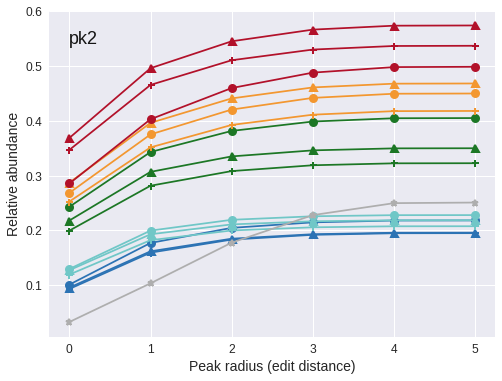

In [189]:
sample_plot_kwargs = {
    'R0': {'color': '#AEAEAE', 'marker': '*'}
}

color_list = ['#2C73B4', '#70C7C7', '#1C7725', '#F39730', '#B2112A']
marker_list = ['o', '+', '^']

for byo, color in zip(['A', 'B', 'C', 'D', 'E'], color_list):
    for rep, marker in zip(['1', '2', '3'], marker_list):
        sample_plot_kwargs[byo + rep] = {'color': color, 'marker': marker}
        
peak_abun_plot(peak=pool_peaks[0], max_radius=5, sample_plot_kwargs=sample_plot_kwargs, rel_abun_table=byo_table.filtered_rel_abun)

/home/yuning/research/k-seq/src/pkg/k_seq/data/landscape.py:57: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


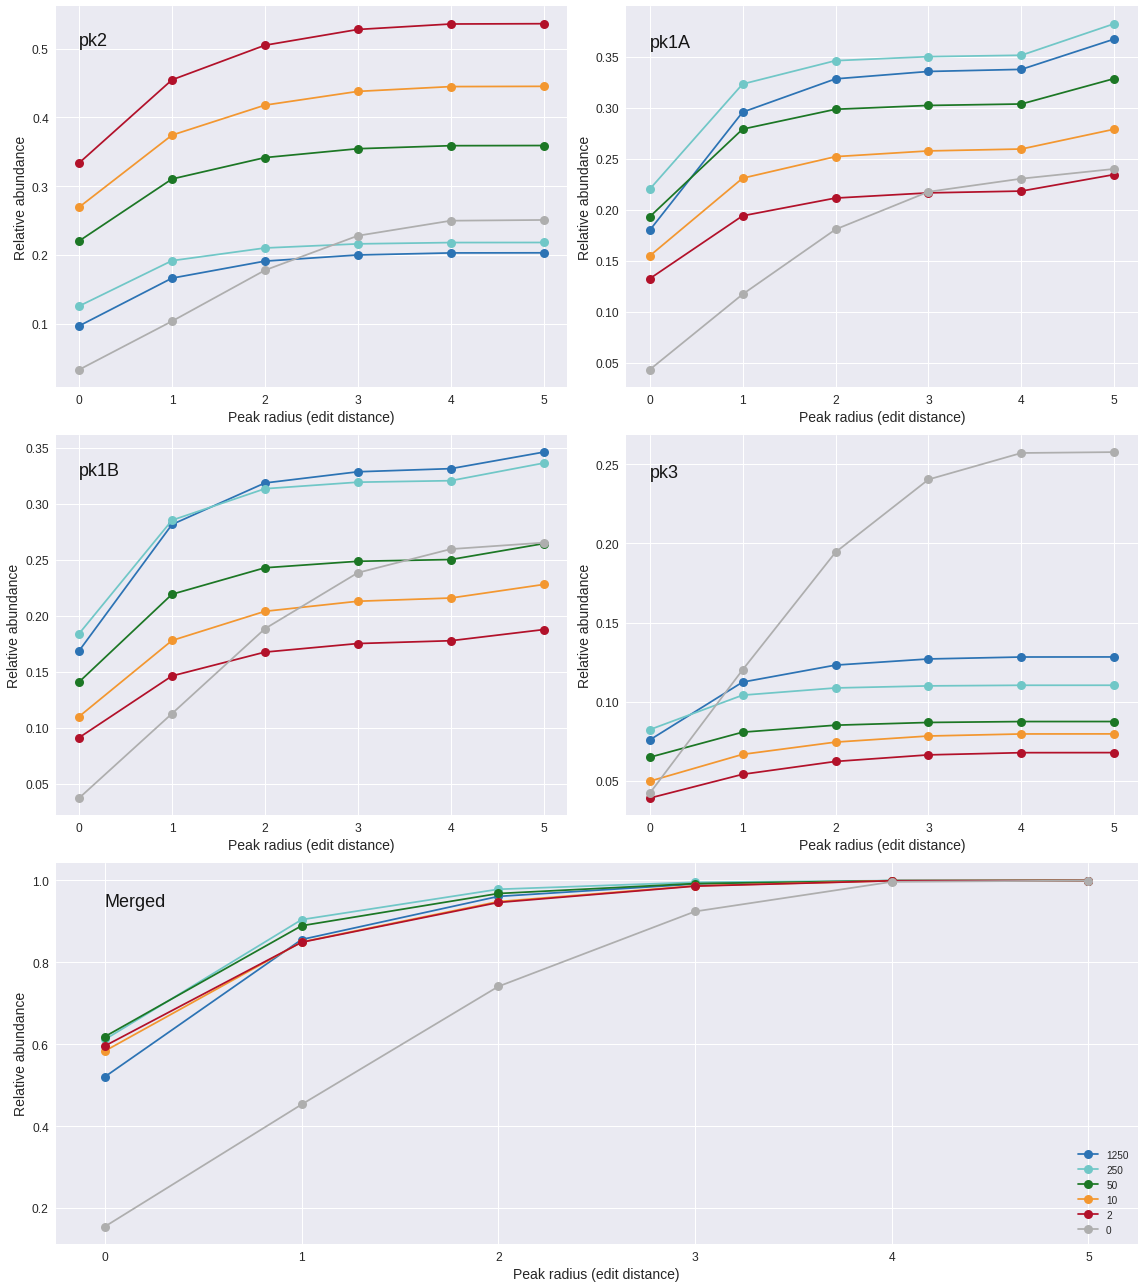

In [192]:
fig = plt.figure(figsize=[16, 18], constrained_layout=False)
gs = fig.add_gridspec(3, 2)

sample_grouper = {
    1250: ['A1', 'A2', 'A3'],
    250: ['B1', 'B2', 'B3'],
    50: ['C1', 'C2', 'C3'],
    10: ['D1', 'D2', 'D3'],
    2: ['E1', 'E2', 'E3'],
    0: ['R0']
}

axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2, :])
]


sample_plot_kwargs = {
    1250: {'color': '#2C73B4', 'marker': 'o', 'alpha': 1},
    250: {'color': '#70C7C7', 'marker': 'o', 'alpha': 1},
    50: {'color': '#1C7725', 'marker': 'o', 'alpha': 1},
    10: {'color': '#F39730', 'marker': 'o', 'alpha': 1},
    2: {'color': '#B2112A', 'marker': 'o', 'alpha': 1},
    0: {'color': '#AEAEAE', 'marker': 'o', 'alpha': 1},
}
        
peak_list = pool_peaks + [landscape.Peaks.from_peak_list(pool_peaks)]
peak_list[-1].name = 'Merged'

for peak, ax in zip(peak_list, axes):
    peak_abun_plot(peak=peak, max_radius=5, sample_grouper=sample_grouper,
                   sample_plot_kwargs=sample_plot_kwargs,
                   rel_abun_table=byo_table.filtered_rel_abun, ax=ax)
axes[-1].legend(loc='lower right')
plt.tight_layout()
plt.show()

In [178]:
def peak_abun_kin_plot(peak, max_radius, sample_grouper, rel_abun_table=None, sample_plot_kwargs=None, ax=None, save_fig_to=None):
    peak_abun_info = peak.peak_abun(max_radius=max_radius,
                                    rel_abun_table=rel_abun_table)
    
    peak_abun_kin_info = pd.DataFrame.from_dict(
        {x_val: peak_abun_info[group].mean(axis=1)
         for x_val, group in sample_grouper.items()},
        orient='index'
    )
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=[8, 6])
        
    if sample_plot_kwargs is None:
        from k_seq.utility.plot_tools import PlotPreset
        colors = PlotPreset.colors(num=len(peak_abun_kin_info.columns))
        markers = PlotPreset.markers(num=len(peak_abun_kin_info.columns), with_line=False)
        sample_plot_kwargs = {
            sample: {'color': color,
                     'marker': marker}
            for sample, color, marker in zip(peak_abun_kin_info.columns, colors, markers)
        }
        
    loc = peak_abun_kin_info.index
    
    for dist in peak_abun_kin_info.columns:
        ax.plot(loc, peak_abun_kin_info[dist], ls='-', markeredgewidth=2, **sample_plot_kwargs[dist], label=f'dist = {dist}')
        
    ax.set_ylabel('Relative abundance', fontsize=14)
    ax.set_xlabel('BYO concentration', fontsize=14)
    ax.tick_params(labelsize=12)
    ylims = ax.get_ylim()
    ax.set_ylim([ylims[0], ylims[1] * 1.2])
    ax.text(s=peak.name, x=0, y=ylims[1] * 1.1, fontsize=18, color='#151515')
    
    if save_fig_to:
        fig.savefig(save_fig_to, bbox_inches='tight', dpi=300)

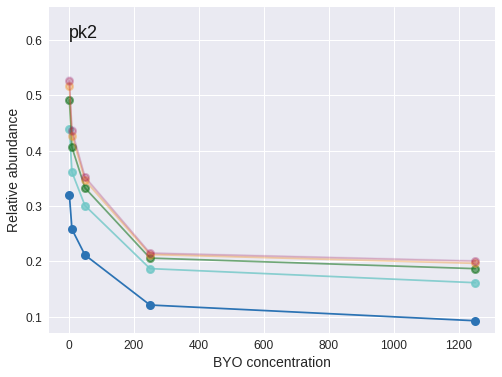

In [179]:
peak_abun_kin_plot(peak_list[0], max_radius=5, sample_grouper=sample_grouper, sample_plot_kwargs=sample_plot_kwargs)

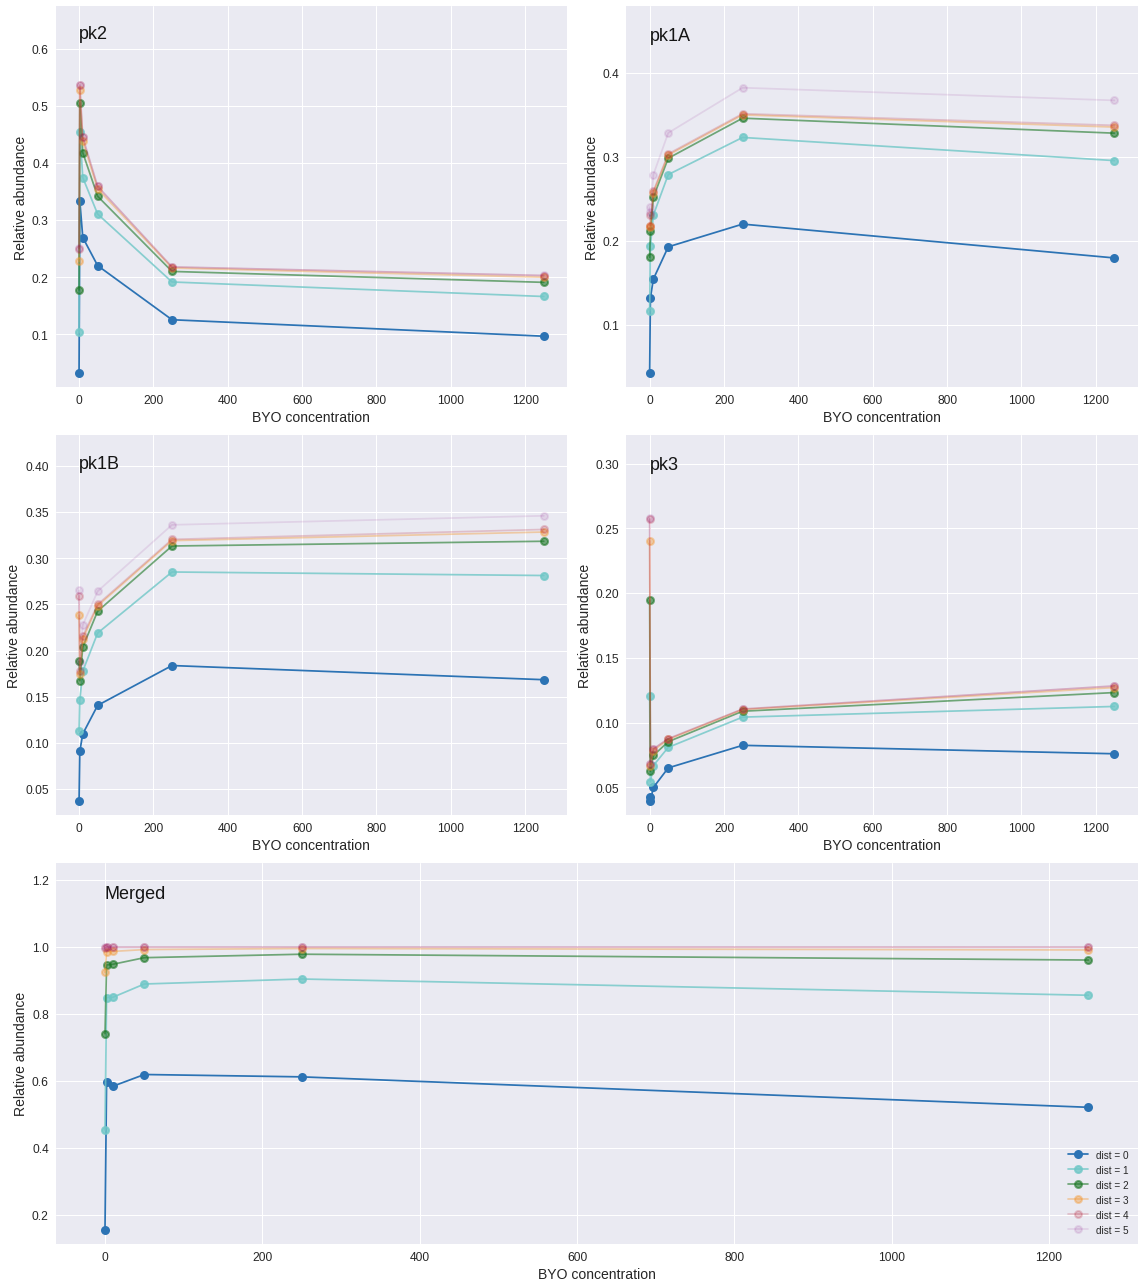

In [185]:
sample_grouper = {
    1250: ['A1', 'A2', 'A3'],
    250: ['B1', 'B2', 'B3'],
    50: ['C1', 'C2', 'C3'],
    10: ['D1', 'D2', 'D3'],
    2: ['E1', 'E2', 'E3'],
    0: ['R0']
}

sample_plot_kwargs = {
    0: {'color': '#2C73B4', 'marker': 'o', 'alpha': 1},
    1: {'color': '#70C7C7', 'marker': 'o', 'alpha': 0.8},
    2: {'color': '#1C7725', 'marker': 'o', 'alpha': 0.6},
    3: {'color': '#F39730', 'marker': 'o', 'alpha': 0.4},
    4: {'color': '#B2112A', 'marker': 'o', 'alpha': 0.2},
    5: {'color': '#810080', 'marker': 'o', 'alpha': 0.1},
}

fig = plt.figure(figsize=[16, 18], constrained_layout=False)
gs = fig.add_gridspec(3, 2)
axes = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2, :])
]
        
peak_list = pool_peaks + [landscape.Peaks.from_peak_list(pool_peaks)]
peak_list[-1].name = 'Merged'

for peak, ax in zip(peak_list, axes):
    peak_abun_kin_plot(peak=peak, max_radius=5,
                       sample_grouper=sample_grouper,
                       sample_plot_kwargs=sample_plot_kwargs,
                       rel_abun_table=byo_table.filtered_rel_abun, ax=ax)
axes[-1].legend()
plt.tight_layout()
plt.show()

In [343]:
func_tools.dict_flatten(pd.DataFrame(data=[[0, 1], [3, 1]], index=['ix1', 'ix2'], columns=['col1', 'col2']).to_dict())

{'col1_ix1': 0, 'col1_ix2': 3, 'col2_ix1': 1, 'col2_ix2': 1}

In [308]:
test_series = pd.Series(data=[0, 1, 2, 3, 4], index=[0, 1, 2, 3, 4])

In [347]:
np.full(fill_value=np.nan, shape=(2))

array([nan, nan])

# load results from pod_run

In [3]:
from k_seq.utility import file_tools
reload(file_tools)

<module 'k_seq.utility.file_tools' from '/home/yuning/research/k-seq/src/pkg/k_seq/utility/file_tools.py'>

In [60]:
point_est_res = pd.read_csv('/mnt/storage/projects/k-seq/working/byo_doped/least_square/pod-run_10-21/bs-0_mtd-pct_res_c-40/fit_summary.csv', index_col=0)

In [43]:
point_est_res

,k,A
CTACTTCAAACAATCGGTCTG,209.576805,0.419282
CCACACTTCAAGCAATCGGTC,155.360038,0.455281
ATTACCCTGGTCATCGAGTGA,679.435538,0.287239
AAGTTTGCTAATAGTCGCAAG,164.256725,0.176522
GTACTTCAAACAATCGGTCTG,169.874871,0.306387
...,...,...
CCTCACTTCAAGCCATTGATC,0.020391,0.032159
AAGTTTGCTAATGGCTGCAAA,0.020391,0.032159
CCACACCTCAACCAATCTGCC,0.010577,0.049764
CGACCTCAAACAACCGGTCAG,0.020391,0.032159


In [10]:
def single_to_json(single):
    import json
    
    data_to_json = {
        'fitter': None,
        'point_estimation': {
                'params': single.results.point_estimation.summary.to_json(),
                'pcov': None
            }
    }
    if single.results.uncertainty is None:
        data_to_json['uncertainty'] = {'summary': None, 'record': None}
    else:
        data_to_json['uncertainty'] = {
            'summary': single.results.uncertainty.summary.to_json(),
            'record': single.results.uncertainty.record.to_json()
        }
    return json.dumps(data_to_json)
                
                
def batch_to_json(batch, path=None):
    """Save fitting results as a JSON file
    Structure:

      - fitter: a string representation of the fitter

      - record: {seq: JSON of single fitter results}

    """
    import json
    data_to_json = {
        'fitter': None,
        'record': {seq: single_to_json(result) for seq, result in batch.results.results.items()}
    }

    if path is None:
        return json.dumps(data_to_json)
    else:
        with open(path, 'w') as handle:
            json.dump(data_to_json, handle)

In [11]:
batch_to_json(batch=point_est_res, path='/mnt/storage/projects/k-seq/working/byo_doped/least_square/fitter_bs0_mpct_res_c40_converted_from_pickle.json')

In [12]:
top10000_bs = file_tools.read_pickle('/mnt/storage/projects/k-seq/working/byo_doped/least_square/pod_run_10-19/fitter_bs500_mdata_c40.pkl')

In [14]:
batch_to_json(batch=top10000_bs, path='/mnt/storage/projects/k-seq/working/byo_doped/least_square/pod_run_10-19/fitter_bs500_mdata_c40_converted_from_pickle.json')

In [100]:
top10000_bs.results.results['CTACTTCAAACAATCGGTCTG'].results.uncertainty.summary

,k,A
count,500.000000,500.000000
mean,214.048474,0.426293
std,61.041640,0.068560
min,92.160185,0.271777
2.5%,100.960918,0.324562
50%,212.873462,0.417733
97.5%,322.902732,0.595835
max,414.589583,0.602357


In [5]:
def get_fitter():

    def load_table(table_path):
        from pathlib import Path
        table_path = Path(table_path)
        import pickle
        with open(table_path, 'rb') as handle:
            table = pickle.load(handle)
        return table
    
    from k_seq.estimator.least_square import BatchFitter
    from k_seq.model.kinetic import BYOModel

    # todo: make it CL tool using argparse
    seq_table = load_table(table_path=TABLE_PATH)
    if TEST_MODE:
        seq_test = seq_table.reacted_frac_filtered.index.values[:100]
    else:
        seq_test = None

    batch_fitter = BatchFitter(table=seq_table.reacted_frac_filtered, x_values=seq_table.x_values, model=BYOModel.func_react_frac_no_slope, seq_to_fit=seq_test, bootstrap_num=BS_NUM, bs_return_num=BS_SAVE_NUM, bs_method=BS_METHOD)
    
    return batch_fitter

In [10]:
from k_seq.estimator import least_square
reload(least_square)

TABLE_PATH = '/mnt/storage/projects/k-seq/datasets/byo_doped.pkl'
PKG_PATH = '.'
TEST_MODE = False
CORE_NUM = 40
BS_NUM = 0
BS_SAVE_NUM = 0
BS_METHOD = 'pct_res'

point_est = get_fitter()

In [70]:
abe_res = pd.read_csv('/mnt/storage/projects/k-seq/datasets/byo_on_abes_method/allseqs-name-fit_repeat.csv', index_col='X')[2:]
abe_res

,Abun R5c-counts.txt,L by avg,k by avg,L stdev,k stdev
X,,,,,
GGGGGGAGAAGTTAATGG,0.000191,0.999411,50.765753,0.000000,0.000000
GGGGGAAATGTCAGGTCATGC,0.000191,0.337199,0.674452,0.007564,0.015246
GGGGGAAATTCCAAGGTCATG,0.000191,0.975867,14.310327,0.314230,39.507303
GGGGGAATCCTACGTGTCAAG,0.000191,0.710566,3.027453,0.294333,4.993080
GGGGGAACCGGGTGGCCCCGA,0.000191,0.337198,0.674450,0.007562,0.015242
...,...,...,...,...,...
CCCCC,0.000382,0.337199,0.674452,0.007564,0.015246
CCCC,0.000382,0.999564,55.043066,0.001454,22.233369
CCC,0.002290,0.993262,23.779244,0.009470,17.871010


In [62]:
common_seq = list(set(abe_res.index) & set(point_est_res.index))
print(len(common_seq))

4278


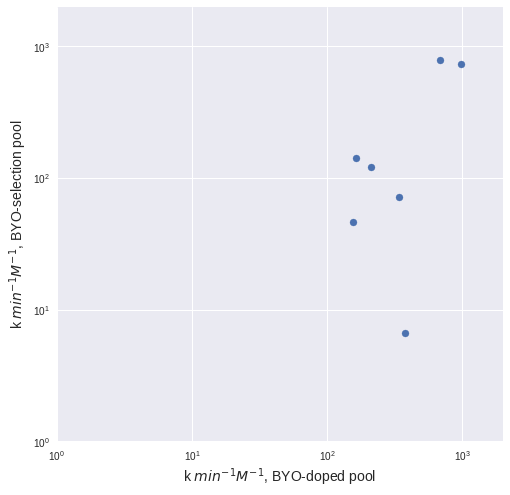

In [54]:
# selected sequences with gel shift results

selected_seqs = {
    'S-2.1-a': ('ATTACCCTGGTCATCGAGTGA', 779, 0.161),
    'S-2.1-t': ('ATTACCCTGGTCATCGAGTGT', 729, 0.158),
    'S-1A.1-a': ('CTACTTCAAACAATCGGTCTG', 121, 0.283),
    'S-1B.1-a': ('CCACACTTCAAGCAATCGGTC', 46.2, 0.865),
   # 'S-1B.2-a': ('CCGCTTCAAGCAATCGGTCGC', 47.3, 0.669),
    'S-1B.3-a': ('CCGAGTTTCAAGCAATCGGTC', 71.2, 0.458),
    'S-3.1-a': ('AAGTTTGCTAATAGTCGCAAG', 142, 0.134),
   # 'S-2.2-a': ('ATTCACCTAGGTCATCGGGTG', 197, 0.132),
   # 'S-1A.1-n': ('CTCTTCAAACAATCGGTCTTC', 74.9, 0.251),
    'S-1C.1-a': ('CTCTTCAATAATCGGTTGCGT', 6.65, 1.000)
}

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
data = np.array([[point_est_res.loc[seq[0]]['k'], seq[1]] for seq in selected_seqs.values()]).T
ax.scatter(data[0], data[1])
ax.set_yscale('log')
ax.set_ylim([1, 2e3])
ax.set_xscale('log')
ax.set_xlim([1, 2e3])
ax.set_xlabel(r'k $min^{-1}M^{-1}$, BYO-doped pool', fontsize=14)
ax.set_ylabel(r'k $min^{-1}M^{-1}$, BYO-selection pool', fontsize=14)

plt.show()

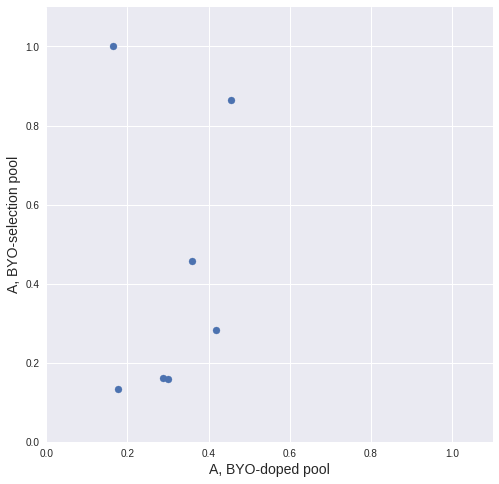

In [57]:
# selected sequences with gel shift results

selected_seqs = {
    'S-2.1-a': ('ATTACCCTGGTCATCGAGTGA', 779, 0.161),
    'S-2.1-t': ('ATTACCCTGGTCATCGAGTGT', 729, 0.158),
    'S-1A.1-a': ('CTACTTCAAACAATCGGTCTG', 121, 0.283),
    'S-1B.1-a': ('CCACACTTCAAGCAATCGGTC', 46.2, 0.865),
   # 'S-1B.2-a': ('CCGCTTCAAGCAATCGGTCGC', 47.3, 0.669),
    'S-1B.3-a': ('CCGAGTTTCAAGCAATCGGTC', 71.2, 0.458),
    'S-3.1-a': ('AAGTTTGCTAATAGTCGCAAG', 142, 0.134),
   # 'S-2.2-a': ('ATTCACCTAGGTCATCGGGTG', 197, 0.132),
   # 'S-1A.1-n': ('CTCTTCAAACAATCGGTCTTC', 74.9, 0.251),
    'S-1C.1-a': ('CTCTTCAATAATCGGTTGCGT', 6.65, 1.000)
}

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
data = np.array([[point_est_res.loc[seq[0]]['A'], seq[2]] for seq in selected_seqs.values()]).T
ax.scatter(data[0], data[1])
# ax.set_yscale('log')
ax.set_ylim([0, 1.1])
# ax.set_xscale('log')
ax.set_xlim([0, 1.1])
ax.set_xlabel(r'A, BYO-doped pool', fontsize=14)
ax.set_ylabel(r'A, BYO-selection pool', fontsize=14)

plt.show()

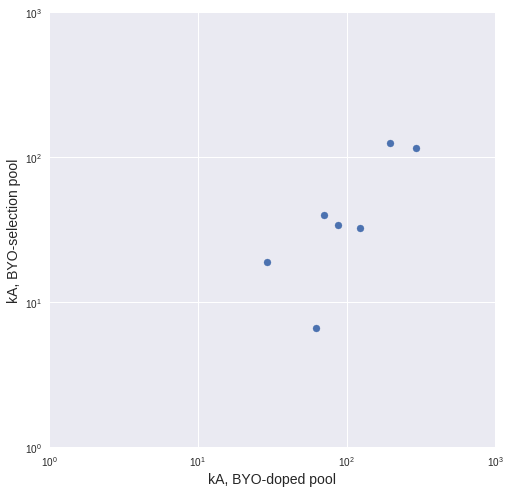

In [58]:
# selected sequences with gel shift results

selected_seqs = {
    'S-2.1-a': ('ATTACCCTGGTCATCGAGTGA', 779, 0.161),
    'S-2.1-t': ('ATTACCCTGGTCATCGAGTGT', 729, 0.158),
    'S-1A.1-a': ('CTACTTCAAACAATCGGTCTG', 121, 0.283),
    'S-1B.1-a': ('CCACACTTCAAGCAATCGGTC', 46.2, 0.865),
   # 'S-1B.2-a': ('CCGCTTCAAGCAATCGGTCGC', 47.3, 0.669),
    'S-1B.3-a': ('CCGAGTTTCAAGCAATCGGTC', 71.2, 0.458),
    'S-3.1-a': ('AAGTTTGCTAATAGTCGCAAG', 142, 0.134),
   # 'S-2.2-a': ('ATTCACCTAGGTCATCGGGTG', 197, 0.132),
   # 'S-1A.1-n': ('CTCTTCAAACAATCGGTCTTC', 74.9, 0.251),
    'S-1C.1-a': ('CTCTTCAATAATCGGTTGCGT', 6.65, 1.000)
}

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
data = np.array([
    [point_est_res.loc[seq[0]]['A'] * point_est_res.loc[seq[0]]['k'], seq[2] * seq[1]] for seq in selected_seqs.values()]).T
ax.scatter(data[0], data[1])
ax.set_yscale('log')
ax.set_ylim([1, 1e3])
ax.set_xscale('log')
ax.set_xlim([1, 1e3])
ax.set_xlabel(r'kA, BYO-doped pool', fontsize=14)
ax.set_ylabel(r'kA, BYO-selection pool', fontsize=14)

plt.show()

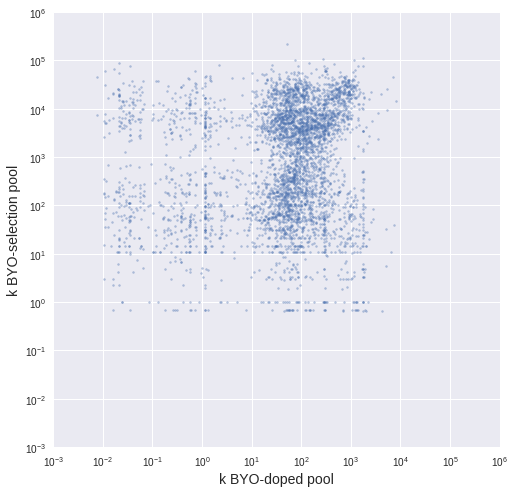

In [69]:
common_seq = list(set(abe_res.index) & set(point_est_res.index))

fig, ax = plt.subplots(1, 1, figsize=[8, 8])

ax.scatter( point_est_res.loc[common_seq]['k'], abe_res.loc[common_seq]['k by avg'], alpha=0.4, s=4)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1e-3, 1e6])
ax.set_ylim([1e-3, 1e6])
ax.set_xlabel(r'k BYO-doped pool', fontsize=14)
ax.set_ylabel(r'k BYO-selection pool', fontsize=14)
plt.show()

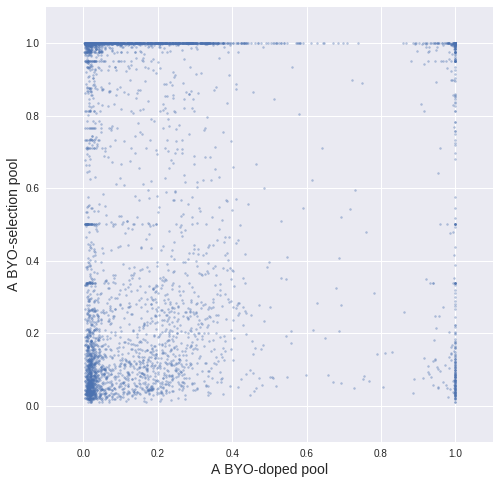

In [65]:
common_seq = list(set(abe_res.index) & set(point_est_res.index))

fig, ax = plt.subplots(1, 1, figsize=[8, 8])

ax.scatter( point_est_res.loc[common_seq]['A'], abe_res.loc[common_seq]['L by avg'], alpha=0.4, s=4)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel(r'A BYO-doped pool', fontsize=14)
ax.set_ylabel(r'A BYO-selection pool', fontsize=14)
plt.show()

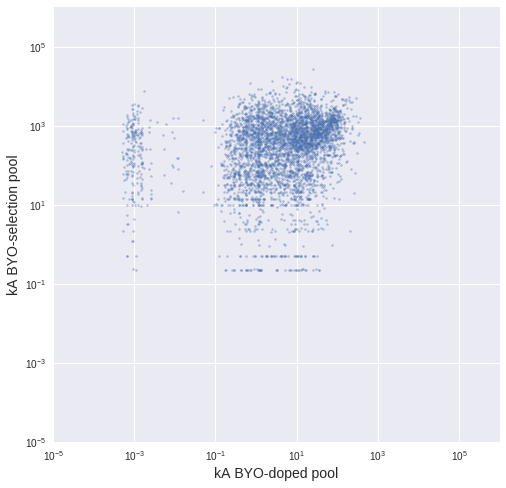

In [71]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])

ax.scatter(point_est_res.loc[common_seq]['A'] * point_est_res.loc[common_seq]['k'], abe_res.loc[common_seq]['L by avg'] * abe_res.loc[common_seq]['k by avg'], alpha=0.4, s=4)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1e-5, 1e6])
ax.set_ylim([1e-5, 1e6])
ax.set_xlabel(r'kA BYO-doped pool', fontsize=14)
ax.set_ylabel(r'kA BYO-selection pool', fontsize=14)
plt.show()

In [34]:
abe_res.loc[list(common_seq)]

,Abun R5c-counts.txt,L by avg,k by avg,L stdev,k stdev
X,,,,,
ATTGCCCTGGTCATCGGGTGC,0.011639,1.000000,355.617450,3.501477e-08,11.607028
ATTACCCTGGTCATCGGGAGC,0.001717,0.999996,169.388709,7.998141e-02,30.341839
CCGCCCTTCAAAAAATCGGTC,0.004198,1.000000,465.934037,4.113195e-11,32.168270
TATACCCTGGTCATCGAGTAA,0.000191,0.975867,14.310327,3.142302e-01,39.507303
GTAAGCTTCAAGCAATCGGTC,0.003053,0.228315,5831.053610,1.418137e-01,2172.464719
...,...,...,...,...,...
GCAGGCTTCAACCAATCGGTC,0.004579,0.323771,2414.515307,2.663786e-01,575.129690
CCCCACTTCAAGCAATCGTTC,0.000382,0.229867,2125.841041,4.374676e-01,14984.969211
ACAACCCTGGTCATCGAGTGC,0.000191,1.000000,340.973402,1.876912e-06,292.150402


In [43]:
top10000_bs = file_tools.read_pickle('/mnt/storage/projects/k-seq/working/byo_doped/least_square/fitter_bs500_mdata_c40.pkl')

In [11]:
top10000_bs.results.summary()

,k,A,k_mean,k_std,k_2.5%,k_50%,k_97.5%,A_mean,A_std,A_2.5%,A_50%,A_97.5%
CTACTTCAAACAATCGGTCTG,209.582837,0.419280,214.048474,61.041640,100.960918,212.873462,322.902732,0.426293,0.068560,0.324562,0.417733,0.595835
CCACACTTCAAGCAATCGGTC,155.361003,0.455281,166.823291,53.484990,77.591339,162.994980,271.378316,0.488911,0.653414,0.338528,0.441911,0.675208
ATTACCCTGGTCATCGAGTGA,679.436067,0.287238,698.483230,189.350723,376.840645,686.803336,1093.051456,0.287023,0.027097,0.244985,0.284966,0.344741
AAGTTTGCTAATAGTCGCAAG,164.256765,0.176522,169.127548,55.795960,79.465382,164.875313,282.543788,0.182783,0.033944,0.138557,0.176908,0.252731
GTACTTCAAACAATCGGTCTG,169.875897,0.306387,178.590630,54.129192,87.070435,180.373845,279.963793,0.311069,0.055571,0.240873,0.295416,0.435505
...,...,...,...,...,...,...,...,...,...,...,...,...
CTGCTTCAAACAATCAGTCAG,58.663305,0.216556,77.450426,50.647574,11.765385,60.166441,184.408061,0.263782,0.196569,0.108632,0.215297,0.826772
CTACTTCAATTAATCGGTGTG,58.229079,0.080430,62.617822,36.276963,30.764348,57.308761,116.208164,0.083197,0.036178,0.052379,0.081103,0.111105
ATTGTCCTGGTCATCGAGTGG,35.918151,0.114220,40.537949,20.631972,7.294326,37.947933,83.459373,0.150917,0.184650,0.066860,0.109621,0.431392
TGACTTCAAACAATCTGTCTG,62.784885,0.086128,71.468209,33.030280,24.128128,66.921012,141.002844,0.089835,0.029056,0.061739,0.084707,0.158169


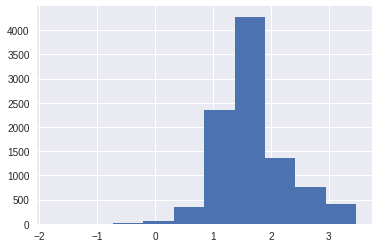

In [15]:
np.log10(top10000_bs.results.summary()['k']).hist()
plt.show()

In [18]:
file_tools.dump_pickle(top10000_bs.results, path='/mnt/storage/projects/k-seq/working/byo_doped/least_square/fitter_bs500_mdata_c40_results.pkl')

In [27]:
top10000_bs.results.results['CTACTTCAAACAATCGGTCTG'].results

In [41]:
import json

bs = top10000_bs.results.results['CTACTTCAAACAATCGGTCTG'].results.uncertainty

In [54]:
test = '/mnt/storage/projects.json'
json.load(test)

AttributeError: 'str' object has no attribute 'read'

In [43]:
def bs_to_json(bs):
    
    data_to_dump = {
        'fitter': str(bs.fitter),
        'bootstrap_num': bs.bootstrap_num,
        'grouper': bs.grouper if hasattr(bs, 'grouepr') else None,
        'method': bs.method,
        'record': bs.record.to_json(),
        'summary': bs.summary.to_json()
    }
    
    return json.dumps(data_to_dump)

In [44]:
bs_json = bs_to_json(bs)

In [46]:
bs_recoverd = json.loads(bs_json)

In [50]:
bs.record

,k,A,x_data,y_data
276,244.687588,0.392767,B1 0.000250 C1 0.000050 B3 0.000250 D...,B1 0.378180 C1 0.153022 B3 0.378988 D...
10,267.530279,0.358241,A1 0.001250 D2 0.000010 B3 0.000250 C...,A1 0.270427 D2 0.029956 B3 0.378988 C...
286,253.537343,0.396468,C1 0.000050 E3 0.000002 A2 0.001250 D...,C1 0.153022 E3 0.005430 A2 0.369641 D...
251,166.327244,0.458186,D3 0.00001 D2 0.00001 C3 0.00005 A3 ...,D3 0.029584 D2 0.029956 C3 0.154642 A...
427,188.851039,0.446624,D2 0.000010 D1 0.000010 E3 0.000002 B...,D2 0.029956 D1 0.030471 E3 0.005430 B...
...,...,...,...,...
446,256.604364,0.353225,E1 0.000002 E2 0.000002 E1 0.000002 C...,E1 0.006454 E2 0.006420 E1 0.006454 C...
109,308.246298,0.351536,E1 0.000002 B1 0.000250 B1 0.000250 E...,E1 0.006454 B1 0.378180 B1 0.378180 E...
182,130.198077,0.515170,E2 0.000002 A3 0.001250 D2 0.000010 A...,E2 0.006420 A3 0.598627 D2 0.029956 A...
95,122.098800,0.583283,E1 0.000002 D1 0.000010 C1 0.000050 C...,E1 0.006454 D1 0.030471 C1 0.153022 C...


In [51]:
pd.read_json(bs_recoverd['summary'])

,k,A
count,500.000000,500.000000
mean,214.048474,0.426293
std,61.041640,0.068560
min,92.160185,0.271777
2.5%,100.960918,0.324562
50%,212.873462,0.417733
97.5%,322.902732,0.595835
max,414.589583,0.602357


In [48]:
bs_recoverd['record']

'{"k":{"276":244.6875875334,"10":267.5302786266,"286":253.5373431621,"251":166.3272444417,"427":188.851039312,"326":232.20996002,"7":184.850769398,"477":253.6026999821,"305":99.7253424185,"392":311.0450105109,"404":212.5769189319,"15":120.1141250263,"39":106.7586940122,"245":317.8007985432,"469":272.2828757736,"444":237.5107289901,"190":218.5859667502,"401":202.2391933997,"196":269.868577242,"284":224.8042858479,"296":202.8323637673,"192":241.7910239202,"90":219.8381944549,"147":128.4572158042,"252":229.5249413271,"384":391.1896872843,"282":139.785298054,"26":263.3440728576,"5":238.7990080505,"229":253.7323024467,"3":255.7191547855,"51":257.1232336584,"341":199.418976893,"0":286.2839680501,"331":248.7302544551,"332":216.9208925777,"349":307.3917932187,"277":101.7744014667,"484":150.539793648,"13":281.6820314344,"481":175.0100798742,"279":176.7704967046,"250":186.5589239029,"354":223.8912356558,"71":111.3390467745,"127":155.8073313132,"179":184.0283752121,"335":249.8407640713,"151":155.

limit_output extension: Maximum message size of 10000 exceeded with 52306 characters

In [31]:
top10000_bs.results

'{"k":{"CTACTTCAAACAATCGGTCTG":209.5828373665,"CCACACTTCAAGCAATCGGTC":155.3610026725,"ATTACCCTGGTCATCGAGTGA":679.4360665063,"AAGTTTGCTAATAGTCGCAAG":164.2567647405,"GTACTTCAAACAATCGGTCTG":169.8758970046,"CTACTTCAATCAATCGGTCTG":105.1980899586,"CCACTCTTCAAGCAATCGGTC":87.1981562049,"TCACACTTCAAGCAATCGGTC":143.6278567591,"CTTCTTCAAACAATCGGTCTG":131.6193772033,"CTACACTTCAAGCAATCGGTC":159.7015277548,"CCTCACTTCAAGCAATCGGTC":161.0185846729,"GCACACTTCAAGCAATCGGTC":126.818853224,"CTACTTCAACCAATCGGTCTG":97.4325356935,"CAACACTTCAAGCAATCGGTC":135.6193965118,"CCACTTCAAACAATCGGTCTG":188.31990688,"TTACTTCAAACAATCGGTCTG":210.2961979576,"ATACTTCAAACAATCGGTCTG":100.2098738156,"CCAAACTTCAAGCAATCGGTC":75.5508231636,"CCATACTTCAAGCAATCGGTC":66.3680115838,"ACACACTTCAAGCAATCGGTC":102.8745778284,"CTAGTTCAAACAATCGGTCTG":42.9217801809,"CCACACTTCAACCAATCGGTC":159.709922452,"CCACACTTCAATCAATCGGTC":134.004244079,"CTCCTTCAAACAATCGGTCTG":206.1514811346,"CCAGACTTCAAGCAATCGGTC":113.4294938042,"ATTACCCTGGTCATCGAGTGC":117.

limit_output extension: Maximum message size of 10000 exceeded with 4500159 characters